In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
try:
  from datasets import load_dataset
except Exception:
  !pip install datasets -q
  from datasets import load_dataset


try:
    from wordcloud import WordCloud
except Exception:
    !pip install wordcloud -q
    from wordcloud import WordCloud


try:
    from sentence_transformers import SentenceTransformer
except:
    !pip install sentence-transformers -q
    from sentence_transformers import SentenceTransformer


import re
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Loading

In [ ]:
dataset = load_dataset("yelp_review_full")
train_dataset = dataset['train']
test_dataset = dataset['test']


del dataset

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
train_text = [train_dataset[i]['text'] for i in range(len(train_dataset))]
train_label = [train_dataset[i]['label'] for i in range(len(train_dataset))]

test_text = [test_dataset[i]['text'] for i in range(len(test_dataset))]
test_label = [test_dataset[i]['label'] for i in range(len(test_dataset))]


del train_dataset
del test_dataset

In [ ]:
print(f"The number of samples in the trainset is: {len(train_text)}")
print(f"The number of samples in the testset is: {len(test_text)}")

The number of samples in the trainset is: 650000
The number of samples in the testset is: 50000


In [ ]:
print(f"The first text in the trainset is: \n  {train_text[0]}")

The first text in the trainset is: 
  dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.


# Data insight

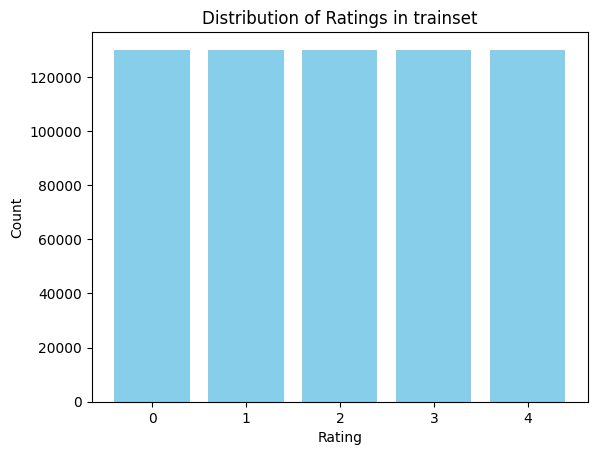

In [ ]:
unique_ratings, counts = np.unique(train_label, return_counts=True)
plt.bar(unique_ratings, counts, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in trainset')
plt.show()

Fining and removing emoticons in the texts:

In [ ]:
emoticon_regex = '(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)'
concatenated_texts = ' '.join(train_text)
emoticons_in_texts = re.findall(emoticon_regex, concatenated_texts)

counts = nltk.Counter(emoticons_in_texts)
counts = counts.most_common()

for emoticon, count in counts:
    print(f"{emoticon} --> {count}")

:) --> 12067
:( --> 4058
;) --> 2138
:-) --> 1638
=) --> 1024
8) --> 886
:/ --> 696
:D --> 620
:-( --> 502
;-) --> 437
:P --> 368
B) --> 322
=( --> 290
BO --> 241
8$ --> 236
83 --> 170
:-/ --> 168
=/ --> 151
BP --> 129
=P --> 129
=D --> 114
:p --> 107
BD --> 96
;( --> 88
:-D --> 73
8p --> 49
:-O --> 40
;D --> 40
;P --> 37
:-P --> 32
:3 --> 27
;p --> 27
:O --> 25
:| --> 24
;-( --> 24
B3 --> 22
:-p --> 17
=p --> 16
:-| --> 15
;/ --> 14
=3 --> 11
8( --> 10
=-) --> 8
8* --> 8
8-) --> 7
8/ --> 7
;-P --> 7
:^) --> 6
8P --> 5
;-p --> 5
B/ --> 5
:^( --> 5
8-3 --> 5
B-) --> 5
:15pm: --> 4
;^) --> 4
:00PM: --> 4
:00pm: --> 4
:30pm: --> 4
=O --> 4
=$ --> 4
:^/ --> 3
:20pm: --> 3
:35pm: --> 3
8-( --> 3
B$ --> 3
:20: --> 2
Bp --> 2
:30PM: --> 2
:40pm: --> 2
:55pm: --> 2
:30: --> 2
;-/ --> 2
=-( --> 2
8O --> 2
B* --> 2
:10: --> 2
B-/ --> 2
;-D --> 2
=| --> 1
=-P --> 1
=^) --> 1
:@ --> 1
:dr: --> 1
:drool: --> 1
;3 --> 1
:LOL: --> 1
=-/ --> 1
:cough: --> 1
:15PM: --> 1
:35PM: --> 1
:42PM: --> 1
:45PM

In [ ]:
train_text_noemot = [re.sub(emoticon_regex, '', tweet) for tweet in tqdm(train_text)]
test_text_noemot  = [re.sub(emoticon_regex, '', tweet) for tweet in tqdm(test_text)]

100%|██████████| 50000/50000 [00:01<00:00, 41310.00it/s]


In [ ]:
tokenized_train = [re.sub('\W', ' ', sentence).lower().split() for sentence in tqdm(train_text_noemot)]
tokenized_test  = [re.sub('\W', ' ', sentence).lower().split() for sentence in tqdm(test_text_noemot)]

100%|██████████| 50000/50000 [00:03<00:00, 13925.44it/s]


In [ ]:
print(f"The first text in the trainset is:\n{train_text_noemot[0]}", end = "\n\n")
print(f"The tokenized version of the text is:\n{tokenized_train[0]}")

The first text in the trainset is:
dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.

The tokenized version of the text is:
['dr', 'goldberg', 'offers', 'everything', 'i', 'look', 'for', 'in', 'a', 'general', 'practitioner', 'he', 's', 'nice', 'and', 'easy', 'to', 'talk', 'to', 'without', 'being', 'patronizing', 'he', 's', 'always', 'on', 'time', 'in', 'seeing', 'his', 'patients', 'he', 's', 'affiliated', 'with', 'a', 'top', 'notch', 'hospital', 'nyu', 'which', 'my', 'parents', 'have', 'explained', 'to', 'me',

In [ ]:
all_words_train  = [word for sublist in tqdm(tokenized_train) for word in sublist]
lenght_of_docs_train = [ len(doc) for doc in tqdm(tokenized_train)]

word_counts = Counter(all_words_train)
most_common_words = word_counts.most_common()

100%|██████████| 650000/650000 [00:00<00:00, 2048469.34it/s]


In [ ]:
print (f"The total number of words in the trainset is :{len(all_words_train)}")
print (f"The avarage number of words per document is :{round(np.mean(lenght_of_docs_train))}")
print (f"The total number of nique words in the corpus is :{len(set(all_words_train))}", end = "\n\n")

print("10 most frequent words in the whole corpus:")
for i in range(10):
  print(most_common_words[i])

print("\n10 least frequent words in the whole corpus:")
for i in range(10):
  print(most_common_words[-i-1])


The total number of words in the trainset is :91008798
The avarage number of words per document is :140
The total number of nique words in the corpus is :242872

10 most frequent words in the whole corpus:
('the', 4374873)
('and', 2783884)
('i', 2557449)
('a', 2255246)
('to', 2166411)
('was', 1583541)
('it', 1375099)
('of', 1319577)
('for', 1022397)
('in', 1002861)

10 least frequent words in the whole corpus:
('glupey', 1)
('luuuuuuuu', 1)
('losada', 1)
('euriamis', 1)
('rickyyyyyyyy', 1)
('slinkys', 1)
('lightheartedness', 1)
('dugana', 1)
('titiya', 1)
('kalaguen', 1)


In [ ]:
del lenght_of_docs_train
del most_common_words
del word_counts

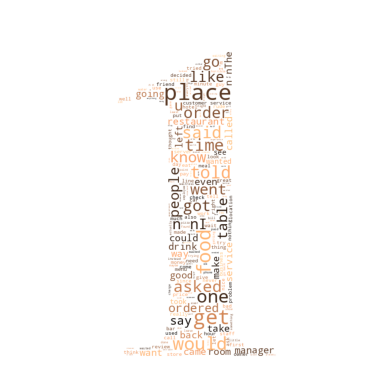

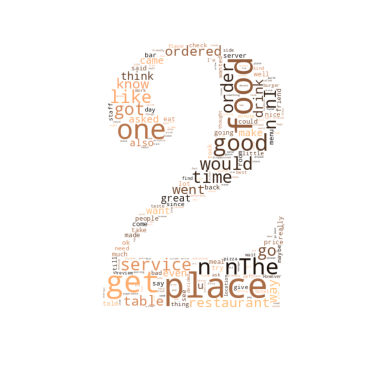

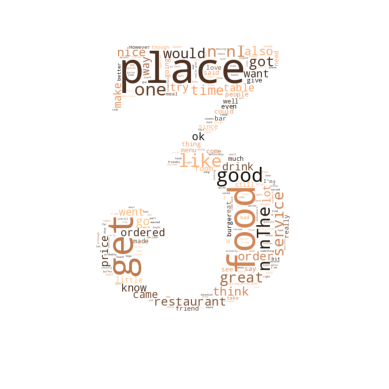

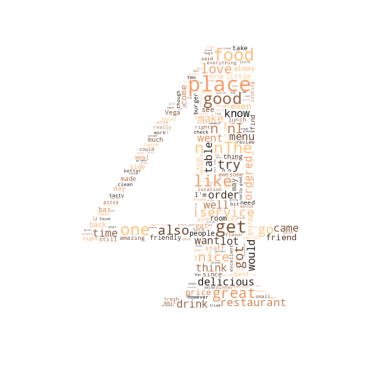

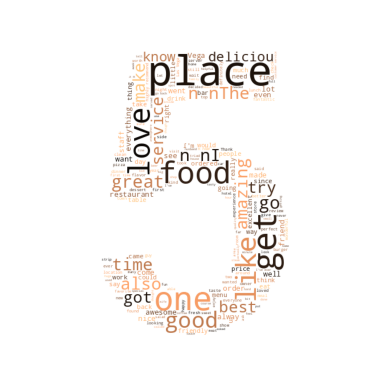

In [ ]:
from PIL import Image



def find_wordcloud(texts: list, mask_image: np.array):
    return WordCloud(
        background_color='#FFFFFF',
        mask=mask_image,
        contour_width=2,
        contour_color='#FFFFFF',
        colormap='copper',
        stopwords=stopwords.words('english')
    ).generate(' '.join(texts))

def find_texts_based_on_label(corpus: list, corpus_labels: list, filtered_label: int) -> list:
    results = []

    for index, text_label in enumerate(corpus_labels):
        if text_label == filtered_label:
            results.append(corpus[index])

    return results

for label in sorted(np.unique(train_label)):
    texts = find_texts_based_on_label(train_text, train_label, label)
    mask_image = np.array(Image.open(f"/content/drive/MyDrive/Projects/NLP/{label+1}.png"))

    wc = find_wordcloud(texts, mask_image)
    plt.figure()  # Create a new plot for each word cloud
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

del texts
del mask_image
del wc

# Clustring Training Text

## Clustering with TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_sampled, _ , _ , _ = train_test_split(
    train_text_noemot, train_label, train_size=20_000, stratify=train_label, random_state = 42
)


vectorizer = TfidfVectorizer(max_df = 0.7, min_df = 20, stop_words = 'english')
vectorizer.fit(X_sampled)
vocab = vectorizer.get_feature_names_out()


print(f"Length of vocabulary: {len(vocab)}")

Some ten random words of the vocabulary of the corpus:


In [ ]:
import random

sorted(random.sample(vocab.tolist(), 10))

In [ ]:
vector_documents = vectorizer.transform(X_sampled)
vector_documents.shape

Numerical(TF-IDF) representation of the trainset text has the following dimension:

In [ ]:
nonzero_count = vector_documents.count_nonzero()
doc_count = vector_documents.get_shape()[0]

print(f"Average document vocabulary size: {round(nonzero_count/doc_count)}")

In [ ]:
del test_text
del test_label

Since the dimension of the dataset is too high, a subset of 5000 instances are sampled randomly, then a K-mean clustring is applied on it to find 5 clusters(inspired by range of ratings) finally, the result is visualized.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init='auto')
cluster_assignments = kmeans.fit_predict(vector_documents)

# Step 3: Compute BSS and WSS metrics
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

bss = sum(np.linalg.norm(centroids[i] - centroids.mean(axis=0))**2 for i in range(k))
wss = sum(np.linalg.norm(vector_documents[np.where(labels == i)] - centroids[i])**2 for i in range(k))

print("Between Sum of Squares (BSS):", bss)
print("Within Sum of Squares (WSS):", wss)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(vector_documents)

# Plot the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of K-means clustering')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.colorbar()
plt.show()


## Clustering with SentenceBERT

In [ ]:
vectorizer = SentenceTransformer('efederici/sentence-bert-base')
embeddings = np.array(vectorizer.encode(X_sampled))

k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init='auto')
cluster_assignments = kmeans.fit_predict(embeddings)

# Step 3: Compute BSS and WSS metrics
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

bss = sum(np.linalg.norm(centroids[i] - centroids.mean(axis=0))**2 for i in range(k))
wss = sum(np.linalg.norm(embeddings[np.where(labels == i)] - centroids[i])**2 for i in range(k))

print("Between Sum of Squares (BSS):", bss)
print("Within Sum of Squares (WSS):", wss)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(np.array(embeddings))

# Plot the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of K-means clustering')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.colorbar()
plt.show()


In [ ]:
del embeddings
del vector_documents

# Classification with TFIDF + SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the steps in the pipeline
steps = [
    ('tfidf', TfidfVectorizer()),      # Step 1: TF-IDF vectorization for text data
    ('logistic', LogisticRegression(max_iter=500, n_jobs=-1)) # Step 2: Logistic Regression classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define parameter grid for hyperparameter tuning
param_grid = {
    "tfidf__stop_words": ['english'],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "tfidf__max_df": np.arange(0.5, 1.5, 0.1),
    "tfidf__min_df": np.arange(15, 25, 1),
    "logistic__C": [0.1, 1, 10],
}

# Instantiate the GridSearchCV object with scoring parameter
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train_text_noemot, train_label)

# Accessing the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


# Indexing

In [ ]:
!pip install -q python-terrier
import pyterrier as pt

if not pt.started():
  pt.init()

In [ ]:
train_text_df = pd.DataFrame({'text':text_train, 'docno' : range(1, len(text_train)+1) })

In [ ]:
indexer = pt.DFIndexer("train_index_my", overwrite=True)
index_ref = indexer.index(train_text_df['text'], train_text_df['docno'])
index_ref.toString()

In [ ]:
del train_text_df